<a href="https://colab.research.google.com/github/naorex/Python3rdGrade_Deep_Learning_Beginner/blob/main/Chapter06_CNN%E3%81%A7%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN で犬と猫の画像を学習する

In [2]:
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

In [3]:
# 画像を読み込む
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255, x_test /255

print(f"学習データ: {x_train.shape}")
print(f"テストデータ: {x_test.shape}")

学習データ: (50000, 32, 32, 3)
テストデータ: (10000, 32, 32, 3)


In [4]:
# 猫データと犬データを取り出す
y_train, y_test = y_train.flatten(), y_test.flatten()

cat_train = x_train[np.where(y_train==3)]
dog_train = x_train[np.where(y_train==5)]
cat_test = x_test[np.where(y_test==3)]
dog_test = x_test[np.where(y_test==5)]

print(f"猫の学習データ: {cat_train.shape}")
print(f"犬の学習データ: {dog_train.shape}")
print(f"猫のテストデータ: {cat_test.shape}")
print(f"犬のテストデータ: {dog_test.shape}")

猫の学習データ: (5000, 32, 32, 3)
犬の学習データ: (5000, 32, 32, 3)
猫のテストデータ: (1000, 32, 32, 3)
犬のテストデータ: (1000, 32, 32, 3)


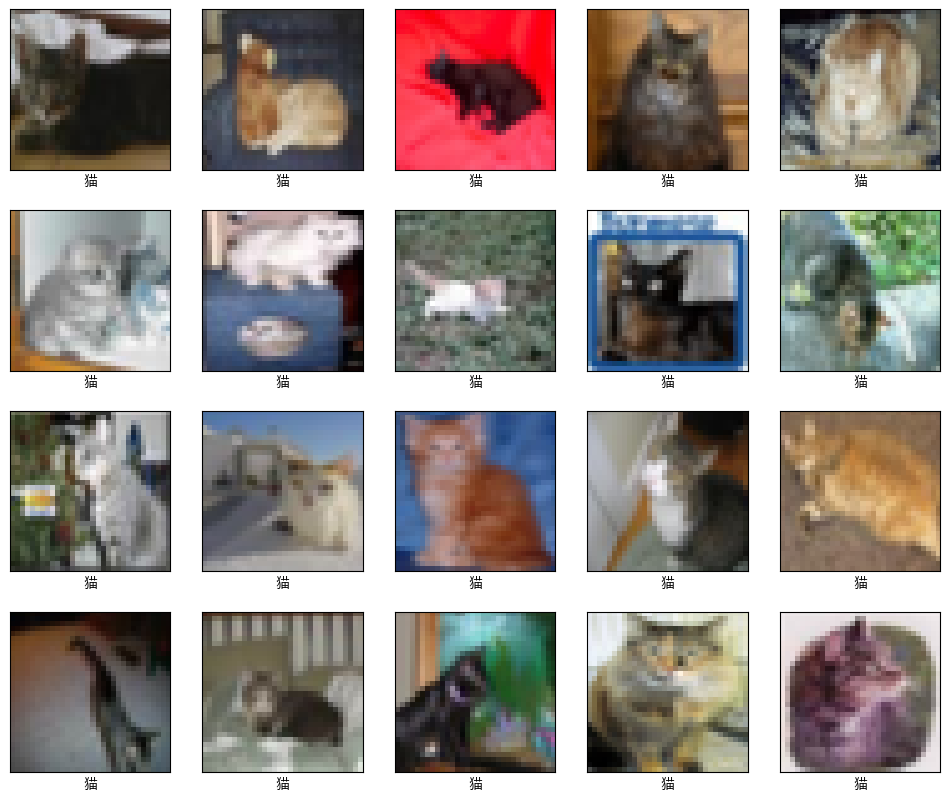

In [5]:
# 確認
def disp_testdata(xdata,namedata):
    plt.figure(figsize=(12,10))
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(xdata[i])
        plt.xlabel(namedata)
    plt.show()

disp_testdata(cat_train,"猫")

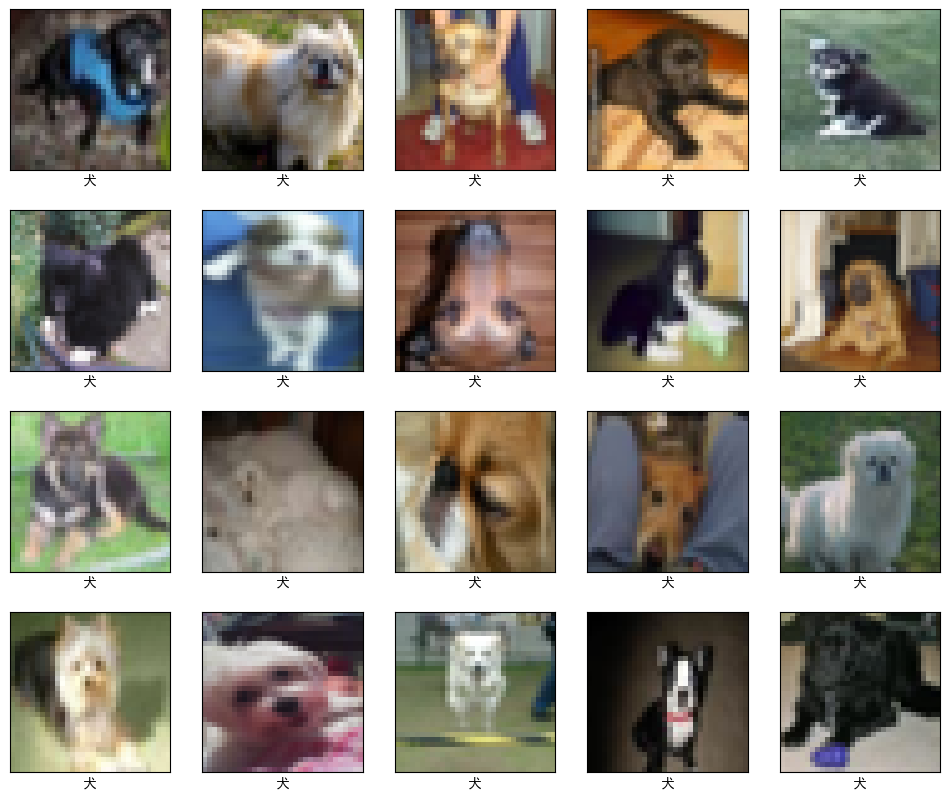

In [6]:
disp_testdata(dog_train,"犬")

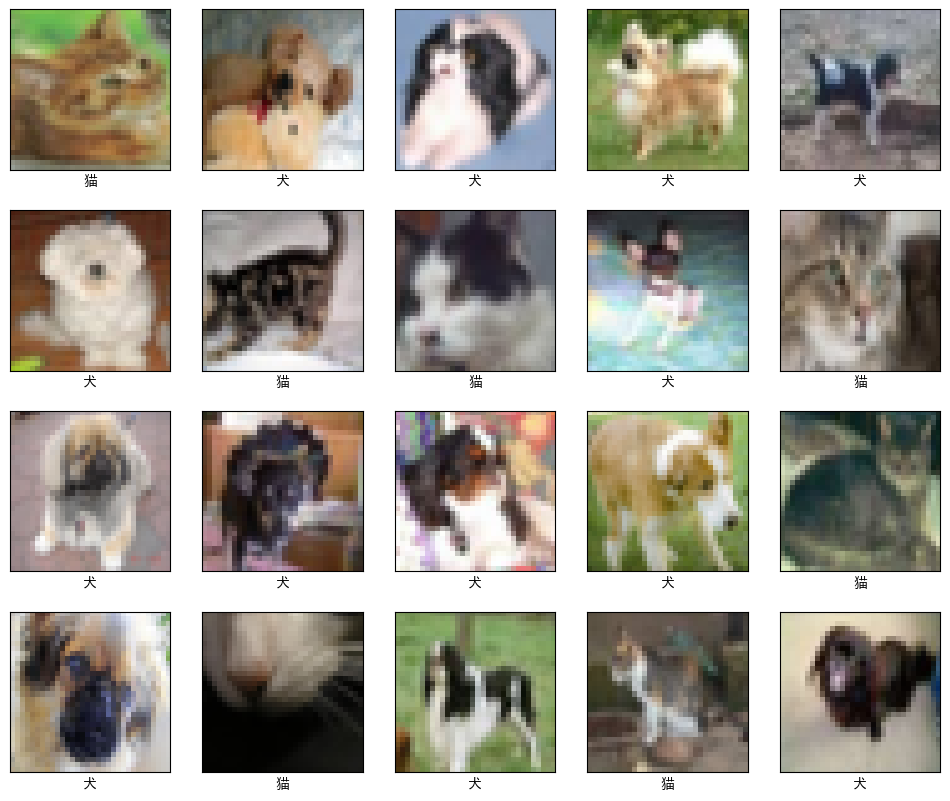

In [7]:
# 猫=0, 犬=1 としてシャッフル
class_names = ["猫","犬"]

x_train = np.concatenate((cat_train,dog_train)) # 猫データに犬データを結合
x_test = np.concatenate((cat_test,dog_test))

y_train = np.concatenate((np.full(5000,0),np.full(5000,1)))
y_test = np.concatenate((np.full(1000,0),np.full(1000,1)))

np.random.seed(1) # ランダムの開始位置を設定
np.random.shuffle(x_test) # シャッフル
np.random.seed(1)
np.random.shuffle(y_test) # 上行と合わせて、x_test と全く同じ並びでシャッフル

plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [8]:
# モデルを作成
model = keras.models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation="relu",input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64,(5,5),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32,activation="relu"))
model.add(layers.Dense(2,activation="softmax"))
model.summary(line_length=120)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                                        ┃ Output Shape                           ┃               Para
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━
│ conv2d (Conv2D)                                     │ (None, 28, 28, 32)                     │                 2,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ max_pooling2d (MaxPooling2D)                        │ (None, 14, 14, 32)                     │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dropout (Dropout)                                   │ (None, 14, 14, 32)                     │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ conv2d_1 (Conv2D)                                   │ (None, 10, 10, 64)                     │                51,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ max_pooling2d_1 (MaxPooling2D)                      │ (None, 5, 5, 64)                       │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dropout_1 (Dropout)                                 │ (None, 5, 5, 64)                       │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ flatten (Flatten)                                   │ (None, 1600)                           │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dense (Dense)                                       │ (None, 64)                             │               102,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dropout_2 (Dropout)                                 │ (None, 64)                             │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dense_1 (Dense)                                     │ (None, 32)                             │                 2,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dense_2 (Dense)                                     │ (None, 2)                              │                   
└─────────────────────────────────────────────────────┴────────────────────────────────────────┴───────────────────

 Total params: 158,306 (618.38 KB)

 Trainable params: 158,306 (618.38 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 学習を実行
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history = model.fit(x_train,y_train,epochs=30,
                    validation_data=(x_test,y_test))
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f"テストデータの正解率: {test_acc}")

Epoch 1/30


FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-10-e011cfbc2672>", line 6, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_4268]

In [ ]:
# 学習を確認
param = [["正解率","accuracy","val_accuracy"],
         ["誤差","loss","val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]],"o-")
    plt.plot(history.history[param[i][2]],"o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"],loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

- 過学習が起こっていると予想

## 学習データを水増し

In [1]:
!pip install --upgrade keras

In [13]:
from keras import __version__
print(f"Keras Version: {__version__}")

Keras Version: 3.8.0


In [14]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 118.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
g = datagen.flow(x_test,y_test,shuffle=False)
g_imgs1 = []
x_g, y_g = g.next()
g_imgs1.extend(x_g)

g = datagen.flow(x_test,y_test,shuffle=False)
g_imgs2 = []
x_g, y_g = g.next()
g_imgs2.extend(x_g)

plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(3,6,i+1)
    plt.imshow(x_test[i],cmap="gray")
    plt.title(class_names[y_g[i]])

for i in range(6):
    plt.subplot(3,6,i+7)
    plt.imshow(g_imgs1[i])

for i in range(6):
    plt.subplot(3,6,i+13)
    plt.imshow(g_imgs2[i])

plt.show()

- エラーのため不可。tensorflow のエラーっぽい